# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:




## 1. Show DataFrame info.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
#read in df
df = pd.read_csv("marketing_customer_analysis.csv")

In [4]:
# show df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## 2. Describe DataFrame.


In [5]:
#describe df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


3. How a plot of the total number of responses.¶


In [7]:
#first I wanted to check the count to see if the graph is correct
df["Response"].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

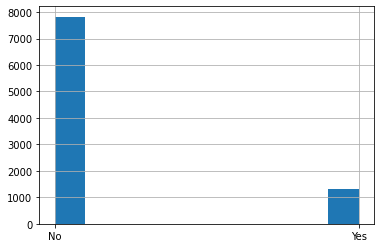

In [13]:
#bar chart to show total number of responses
df['Response'].hist()
plt.show()

## 4. Show a plot of the response rate by the sales channel.


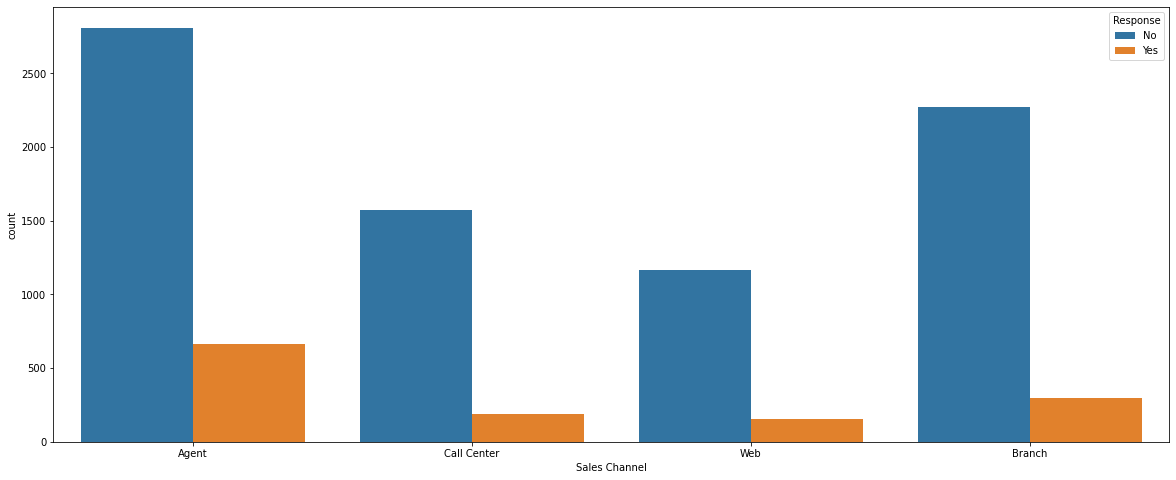

In [20]:
#import warnings lib to ignore warning
import warnings
warnings.filterwarnings('ignore')
#graph shows count of response (yes & no) by sales channel. not sure how to show the response rate as a percentage?
plt.figure(figsize=(20,8))
sns.countplot('Sales Channel', hue='Response', data=df)
plt.show()

## 5. Show a plot of the response rate by the total claim amount.


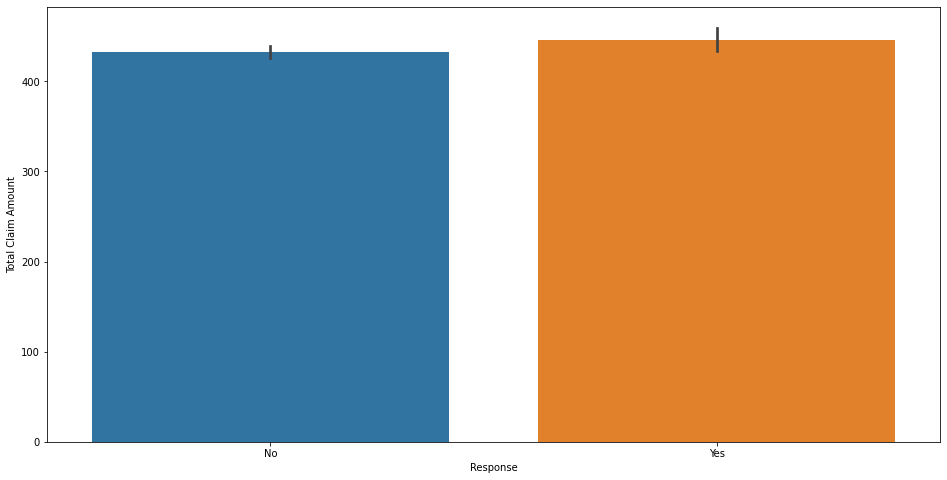

In [9]:
#this just seems to show the average claim amount on the y axis. not sure why? how can I get the actual amounts not just the avg?
plt.figure(figsize=(16,8))

sns.barplot(x="Response", y="Total Claim Amount",  data=df)
plt.show()

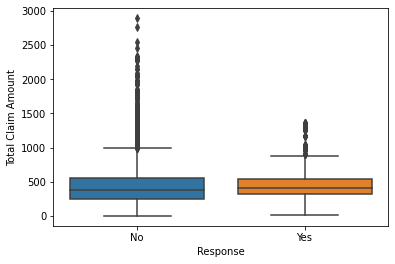

In [13]:
#not sure if a boxplot makes sense here but the total claim amount on the y axis is showing all the amounts from this column unlike the barplot above. again,not sure why?
sns.boxplot(x='Response', y='Total Claim Amount', data=df)
plt.show()

## 6. Show a plot of the response rate by income.

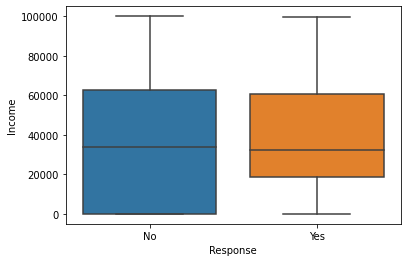

In [12]:
# again, not really sure what the best graph or plot to use is?
sns.boxplot(x='Response', y='Income', data=df)
plt.show()